<a href="https://colab.research.google.com/github/ElizabethSeth/Simplon_tasks/blob/Spark_brief_colab/Copy_of_Projet_Analyse_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projet Spark : Analyse de données d'un service de streaming musical


#### Context du projet  :
On considère un dataset d'un service de streaming musical à explorer.

L'objectif est de tirer des informations utiles sur l'utilisation de la plateforme, le comportement des utilisateurs et les tendances d'écoute, en utilisant les concepts fondamentaux de Spark, pour manipuler et analyser des données à grande échelle.

#### Dataset :
Le dataset utilisé, "spotify_logs.json", contient des logs / journaux d'événements d'une application de streaming musical. Chaque entrée du dataset correspond à une interaction de l'utilisateur avec le service de streaming. Les attributs incluent des informations sur l'utilisateur, telles que son ID, son genre, le niveau d'abonnement, ainsi que des détails sur les événements comme la chanson écoutée, la page visitée, l'heure de l'événement, etc.

#### Objectif du Projet :
Le projet consiste à réaliser une série d'analyses et de calculs sur ces données en utilisant Apache Spark


Ressource utile:
https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/index.html

## Travail demandé et Livrables :

- Ecrire le code Pyspark qui permet de répondre aux questions ci dessous.
- Rendre votre notebook avec la trace d'exécution de vos cellules.



In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=fa7fb63f513fe3d3d3e6ecffbdc8ab937f4e0572d158da85bb93c12ea1d64981
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
#Import des libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, count, when,countDistinct, col, desc, udf, col, sort_array, asc, avg
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.window import Window
from pyspark.sql.types import IntegerType, StringType


import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##  **Charger les données**

- Importer toutes autres libraries dont vous pourriez avoir besoin
- Instancier une session Spark
- Lire le dataset "spotify_logs.json"
- afficher le schéma des données


In [ ]:
#votre code ici
sc = SparkSession \
    .builder \
    .appName("Spotify")\
    .getOrCreate()
sc


In [ ]:
df = sc.read.json('spotify_logs.json')
df.show()


+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [ ]:
top_songs = df.groupBy('artist').count().orderBy('count', ascending=False)
top_songs.show()

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|                NULL| 1653|
|            Coldplay|   83|
|       Kings Of Leon|   69|
|Florence + The Ma...|   52|
|            BjÃÂ¶rk|   46|
|       Dwight Yoakam|   45|
|       Justin Bieber|   43|
|      The Black Keys|   40|
|         OneRepublic|   37|
|        Jack Johnson|   36|
|                Muse|   36|
|           Radiohead|   31|
|        Taylor Swift|   29|
|          Lily Allen|   28|
|Barry Tuckwell/Ac...|   28|
|               Train|   28|
|           Daft Punk|   27|
|          Nickelback|   27|
|           Metallica|   27|
|          Kanye West|   26|
+--------------------+-----+
only showing top 20 rows



In [ ]:

avg_songs_per_user = df.groupBy("userId").agg(count("song").alias("num_songs"))
avg_songs = avg_songs_per_user.agg({"num_songs": "avg"}).withColumnRenamed("avg(num_songs)", "avg_songs_per_user")
avg_songs.show()

+------------------+
|avg_songs_per_user|
+------------------+
| 8.658713692946058|
+------------------+



## **Questions: Exploration et Analyse de données**
2. Combien de logs sont présents dans le dataset ?
3. Combien d'artistes sont présents dans le dataset?
4. Trouver le nombre d'utilisateurs inscrits dans le dataset ?
5. Quels sont les types de niveau d'abonnement (level) disponibles dans le dataset ?
6. Quelles sont les pages disponibles dans le dataset et combien de fois chacune d'elles a-t-elle été visitée ?

7. Combien de logs a enregistré l'utilisateur d'id: 1138,

   Afficher les 5 premiers et les 5 derniers logs de cet utilisateur, que remarquez vous?
8. Combien de pages l'utilisateur avec l'id "" (empty string) n'a-t-il PAS visitée, afficher les .
9. De quel type d'utilisateurs s'agit il à votre avis?
10. Combien d'utilisateurs de chaque genre sont présents dans le dataset ?
11. Visualiser la répartition, Y a-t-il une différence significative entre le nombre d'utilisateurs de chaque genre ?
12. Quel est l'artiste le plus écouté dans le dataset et combien de fois ses chansons ont-elles été jouées ?
13. Combien de chansons différentes ont été jouées dans l'ensemble des logs ?

14. Visualiser le nombre de chansons jouées par heure,  À quelle heure de la journée les utilisateurs écoutent-ils le plus de chansons ?
15. Trouver les utilisateurs qui ont fait des upgrade et downgrade de leur abonnement?

16. Créer une vue temporaire répondre avec des requêtes SQL aux questions suivantes:

 a- Afficher les 3 premiers logs de l'utilisateur d'id 1046

 b- Trouver les pages que les utilisateurs ayant empty userID ont visité

 c- Combien de chansons ont été jouées par l'artiste le plus joué
17. Proposer un axe d'analyse de votre choix ?


In [ ]:
# Combien de logs sont présents dans le dataset ?
print(f"Number of logs in the dataset: {df.count()}")

Number of logs in the dataset: 10000


In [ ]:
#Combien d'artistes sont présents dans le dataset?
print(f"Number of artists in the dataset: {df.select('artist').distinct().count()}")

Number of artists in the dataset: 3618


In [ ]:
#Trouver le nombre d'utilisateurs inscrits dans le dataset ?
print(f"Number of users in the this dataset: {df.select('userId').distinct().count()}")

Number of users in the this dataset: 964


In [ ]:
#Quels sont les types de niveau d'abonnement (level) disponibles dans le dataset ?
print(f"Levels available in this dataset: {df.select('level').distinct().count()}")

Levels available in this dataset: 2


In [ ]:
# Quelles sont les pages disponibles dans le dataset et combien de fois chacune d'elles a-t-elle été visitée ?
print(f"Pages available in this dataset: {df.select('page').distinct().count()}")
print(f"Pages available in this dataset: {df.select('page').distinct().show()}")


Pages available in this dataset: 13
+----------------+
|            page|
+----------------+
|Submit Downgrade|
|            Home|
|       Downgrade|
|          Logout|
|   Save Settings|
|           About|
|        Settings|
|           Login|
|        NextSong|
|            Help|
|         Upgrade|
|           Error|
|  Submit Upgrade|
+----------------+

Pages available in this dataset: None


In [ ]:
#Combien de logs a enregistré l'utilisateur d'id: 1138
print(f"Number of logs for userId that have id== 1138: {df.filter(df.userId== 1138).count()}")
#Afficher les 5 premiers et les 5 derniers logs de cet utilisateur, que remarquez vous?
df.filter(df.userId== 1138).sort('ts').show(5)
df.filter(df.userId== 1138).sort('ts', ascending=False).show(5)


Number of logs for userId that have id== 1138: 68
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|         NULL|Logged In|    Kelly|     F|            2|  Newton|     NULL| paid|Houston-The Woodl...|   GET|    Home|1513283366284|     5566|                NULL|   200|1513729066284|Mozilla/5.0 (Wind...|  1138|
|    Black Box|Logged In|    Kelly|     F|            3|  Newton|247.03955| paid|Houston-The Woodl

In [ ]:
#Combien de pages l'utilisateur avec l'id "" (empty string) n'a-t-il PAS visitée, afficher les .

print(f"Number of users pages with '' : {df.filter(df.userId == '').select('page').distinct().count()}")
print(f"Number of users pages with '' : {df.filter(df.userId == '').select('page').distinct().show()}")

Number of users pages with '' : 4
+-----+
| page|
+-----+
| Home|
|About|
|Login|
| Help|
+-----+

Number of users pages with '' : None


In [ ]:
#De quel type d'utilisateurs s'agit il à votre avis?
print(f"Type of users : {df.select('gender').distinct().count()}")
print(f"there three type of users : {df.select('gender').distinct().show()}")


Type of users : 3
+------+
|gender|
+------+
|     F|
|     M|
|  NULL|
+------+

there three type of users : None


In [ ]:
# Combien d'utilisateurs de chaque genre sont présents dans le dataset ?
print(f"NUmber of users per gender : {df.select('gender').distinct().show()}")


+------+
|gender|
+------+
|     F|
|     M|
|  NULL|
+------+

NUmber of users per gender : None


In [ ]:
# Quel est l'artiste le plus écouté dans le dataset et combien de fois ses chansons ont-elles été jouées ?
top_songs = df.groupBy('artist').count().orderBy('count', ascending=False)
top_songs.show(6)

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|                NULL| 1653|
|            Coldplay|   83|
|       Kings Of Leon|   69|
|Florence + The Ma...|   52|
|            BjÃÂ¶rk|   46|
|       Dwight Yoakam|   45|
+--------------------+-----+
only showing top 6 rows



In [ ]:
# Combien de chansons différentes ont été jouées dans l'ensemble des logs ?
print(f"Number of songs : {df.select('song').distinct().count()}")
print(f"Number of songs : {df.select('song').distinct().show(5)}")

Number of songs : 6126
+-----------------+
|             song|
+-----------------+
|        Lava Lava|
|           Heaven|
|          Banquet|
|           Webers|
|Sex_ Love & Money|
+-----------------+
only showing top 5 rows

Number of songs : None


In [ ]:
# Trouver les utilisateurs qui ont fait des upgrade et downgrade de leur abonnement?
print(f" Users that upgrade and downgrade their abon : {df.filter((df.page == 'Submit Upgrade') | (df.page == 'Submit Downgrade')).count()}")
print(f" Users that upgrade and downgrade their abon : {df.filter((df.page == 'Submit Upgrade') | (df.page == 'Submit Downgrade')).show()}")

 Users that upgrade and downgrade their abon : 11
+------+---------+---------+------+-------------+---------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+
|artist|     auth|firstName|gender|itemInSession| lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|
+------+---------+---------+------+-------------+---------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+
|  NULL|Logged In|   Ashton|     M|            4|   Nelson|  NULL| free|Los Angeles-Long ...|   PUT|  Submit Upgrade|1510608931284|      511|NULL|   307|1513730197284|Mozilla/5.0 (Wind...|   512|
|  NULL|Logged In|   Dreden|     M|            3|Rodriguez|  NULL| free|New York-Newark-J...|   PUT|  Submit Upgrade|1513620661284|     5846|NULL|   307|1513739104284

+----+----------+
|hour|play_count|
+----+----------+
|   0|       548|
|   1|       538|
|   2|       444|
|   3|       367|
|   4|       426|
|   5|       346|
|   6|       432|
|   7|       424|
|   8|       467|
|   9|       294|
|  10|       256|
|  11|       268|
|  12|       297|
|  13|       428|
|  14|       587|
|  15|       579|
|  16|       577|
|  17|       499|
|  18|       421|
|  19|       350|
+----+----------+
only showing top 20 rows



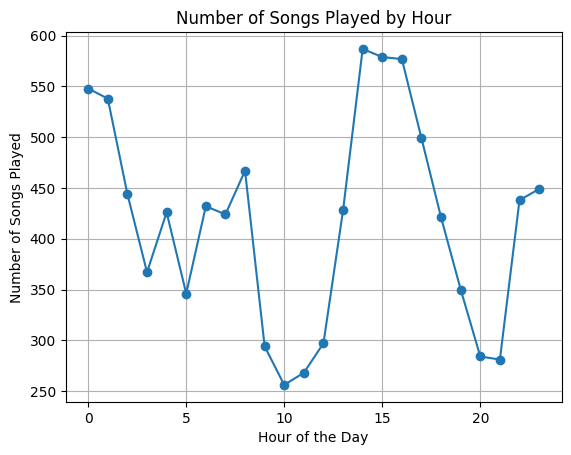

In [ ]:
from pyspark.sql.functions import hour, from_unixtime

# Convert the 'ts' column from BIGINT to TIMESTAMP by dividing by 1000 and using from_unixtime
df = df.withColumn("timestamp", (df.ts / 1000).cast("timestamp"))

# Now extract the hour from the 'timestamp' column
plays_per_hour = df.withColumn("hour", hour("timestamp")) \
                   .groupBy("hour") \
                   .agg(count("*").alias("play_count")) \
                   .orderBy("hour")

plays_per_hour.show()
hour_data = plays_per_hour.collect()
hours = [row['hour'] for row in hour_data]
play_counts = [row['play_count'] for row in hour_data]

plt.plot(hours, play_counts, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Songs Played')
plt.title('Number of Songs Played by Hour')
plt.grid(True)
plt.show()

In [ ]:
# Créer une vue temporaire répondre avec des requêtes SQL aux questions suivantes:
# a- Afficher les 3 premiers logs de l'utilisateur d'id 1046
df.createOrReplaceTempView("logs")
spark.sql("select * from logs where userId == 1046").show(3)


+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|Darius Rucker|Logged In|  Kenneth|     M|          113|Matthews|206.00118| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|  Be W

In [ ]:
#b- Trouver les pages que les utilisateurs ayant empty userID ont visité
spark.sql("select page from logs where userId == ''").show()

+-----+
| page|
+-----+
|Login|
| Home|
| Home|
| Home|
|Login|
|Login|
| Home|
| Home|
|Login|
| Home|
|Login|
| Home|
| Help|
| Home|
|Login|
| Home|
|Login|
| Home|
|Login|
| Home|
+-----+
only showing top 20 rows



In [ ]:
# c- Combien de chansons ont été jouées par l'artiste le plus joué
spark.sql("select artist, count(song) as nb_song from logs group by artist order by nb_song desc").show(1)

+--------+-------+
|  artist|nb_song|
+--------+-------+
|Coldplay|     83|
+--------+-------+
only showing top 1 row



<ipython-input-27-29d2aa26f299>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_songs_pd, x='level', y='avg_songs_played', palette='viridis')


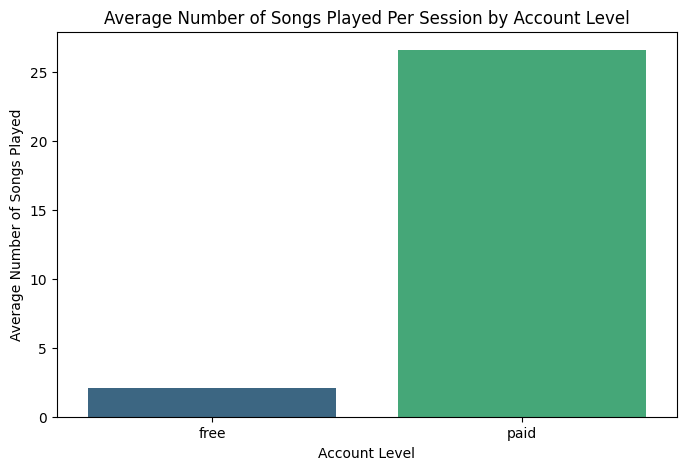

In [ ]:
# Convert the 'ts' column from BIGINT to TIMESTAMP by dividing by 1000 and using from_unixtime
df = df.withColumn('ts', from_unixtime(df['ts'] / 1000))

# Grouping by session and account level to calculate number of songs played per session
session_engagement = df.filter(df['page'] == 'NextSong') \
                      .groupBy(['userId', 'sessionId', 'level']) \
                      .count() \
                      .withColumnRenamed('count', 'songs_played')

# average number of songs played per session by account level
avg_songs_per_session = session_engagement.groupBy('level') \
                                          .agg(avg('songs_played').alias('avg_songs_played'))

avg_songs_pd = avg_songs_per_session.toPandas()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_songs_pd, x='level', y='avg_songs_played', palette='viridis')
plt.title('Average Number of Songs Played Per Session by Account Level')
plt.xlabel('Account Level')
plt.ylabel('Average Number of Songs Played')
plt.show()

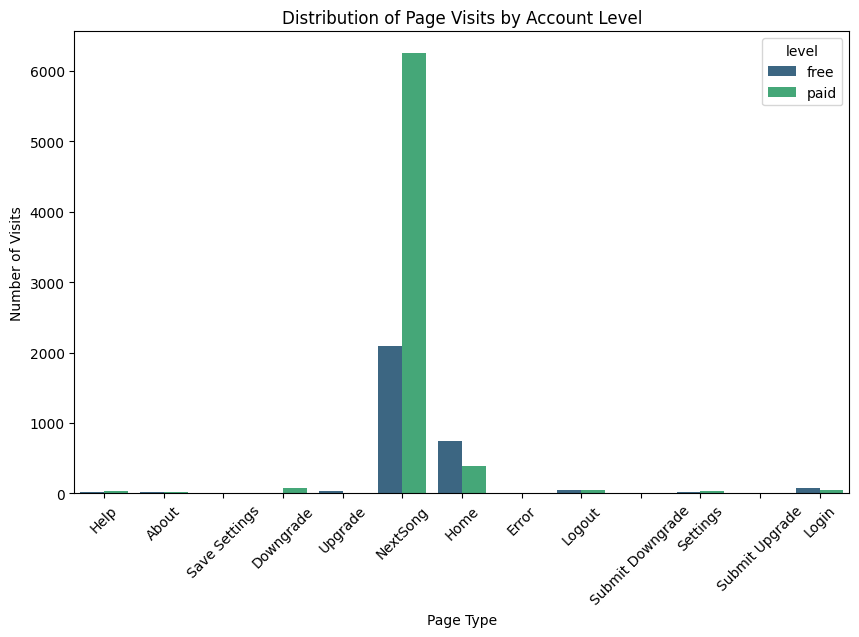

In [ ]:
# Analyzing page visits by account level
page_visits = df.groupBy(['level', 'page']).count()

page_visits_pd = page_visits.toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=page_visits_pd, x='page', y='count', hue='level', palette='viridis')
plt.title('Distribution of Page Visits by Account Level')
plt.xlabel('Page Type')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()
